<a href="https://colab.research.google.com/github/sehaj1001/intro_ml/blob/main/Sehajpreet_Kaur_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 (a) I have divided the shuffled data between training and testing in the ratio 120:30. I tried the following variations:

Activation Functions: 
1. Sigmoid $f(x) = \frac{1}{1+e^{-x}}$ 
2. ReLU $f(x) = max(x,0)$

Cost Functions:
1. Sum of Squared Errors (SSE)
2. Mean Squared Error (MSE)

Having obtained outputs for different combinations of activation functions and cost functions, I obtained the least error using a combination of the Sigmoid activation function and MSE. The algorithm for the same is in the next few sections. The code for the other variations has been commented out.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/hw3data', header=None, delimiter='\t', skipinitialspace=True)  # read the data
data.columns = ['input1', 'input2', 'output']
output = {'Class-1': 0, 'Class-2': 1}  # change output values to binary for easier computation
data.output = [output[item] for item in data.output]

data=data.sample(frac=1).reset_index(drop=True)  # shuffle the data

bias = [1 for i in range(len(data))]
data.insert(0, 'bias', bias)  # add bias=1 as the third input for each pattern

trainingI = data.loc[:119, "bias":"input2"].to_numpy()  # holds input training data (120)
trainingO = data.loc[:119, "output": ].to_numpy()  # holds training data output
testI = data.loc[120:, "bias":"input2"].to_numpy()  # holds input test data (30)
testO = data.loc[120:, "output": ].to_numpy()  # holds test data output

In [ ]:
N = len(trainingI)  # number of training examples
n = len(trainingI[0])  # number of inputs
m = 1  # number of outputs

In [ ]:
def activation(x):  
  # return (np.maximum(x,0))  # activation function used is ReLU
  return (1.0/(1.0 + np.exp(-x)))  # activation function used is binary sigmoid

def activationDer(x):  
  # return 0 if (x<0) else 1  # derivative of ReLU
  return (x*(1.0 - x))  # derivative of binary sigmoid

def forwardPass(weights, x):  # compute forward pass
  a = np.dot(weights, x)  # dot product of inputs and corresponding weights
  return (activation(a))  # reduce to value between 0 and 1

def computeJ(weights, input, output):  # compute the value of J or the cost function
  error = 0.0;
  for i in range(len(input)):  # for each training pattern
    a = forwardPass(weights, input[i])  # compute corresponding output
    b = a - output[i]  # difference between model output and given output in training data
    error = error + np.dot(b,b)  # add dot product to cost function (sse at this point)
  error = error/(len(input)) # cost function used is mse
  return error

In [ ]:
def learn(trainingI, trainingO):  # online learning

  weights = np.random.rand(m, n) - 0.25  # initialise weights randomly between -0.25 and 0.25

  J = 1  # cost function
  epochs = 0
  eta = 0.1  # learning rate

  while (J>0.01) and (epochs<500):  # stopping criteria
    J = computeJ(weights, trainingI, trainingO)  # compute the value of J
    epochs += 1  # increment epochs

    for i in range(N):  # for all input patterns
      a = forwardPass(weights, trainingI[i])  # calculate output using current set of weights

      for j in range(m):  # for all outputs
        for k in range(n):  # update weights for each input in direction of gradient descent
          weights[j,k] = weights[j,k] + eta * (trainingO[i] - a) * activationDer(a) * trainingI[i,k]  # new w = old w + eta(partial of J)

  return weights  # return weights that minimise J

In [ ]:
fin_weights = learn(trainingI, trainingO)  # call function learn

test_err = computeJ(fin_weights, testI, testO)  # compute test error
  
print('The Test Error is', test_err)

The Test Error is 0.07090142170079075


In order to plot the decision boundary for this single layered perceptron, we find an equation for a line that our perceptron uses to delineate between inputs. We know that the output is calculated as $f(w_1 * x_1 + w_2 * x_2 + b)$ where $b = w_0 * x_0$ is the bias and $f$ is the Sigmoid function.

Let $x_1$ be $x$ and $x_2$ be $y$. When this sum is equal to zero, we get $w_1 * x + w_2 * y + b = 0$ which is in the standard form of a line $Ax + By + C$. 

Then, slope or $m = \frac{-A}{B} = \frac{-w_1}{w_2}$ and y-intercept or $c = \frac{-C}{B} = \frac{-b}{w_2}$ which gives us the line $y = \frac{-w_1}{w_2}x + \frac{-b}{w_2}$. Now we can put in the values of the final weights to get the equation for our decision boundary.

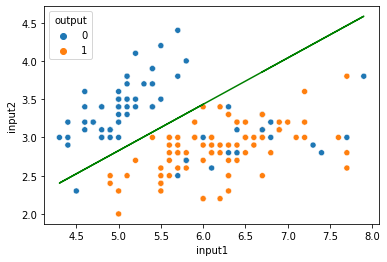

In [ ]:
sns.scatterplot(x="input1", y="input2", hue='output', data=data)  # scatter plot of all data points according to class

m = (-fin_weights[0][1])/fin_weights[0][2]  # slope as calculated above
c = (-fin_weights[0][0])/fin_weights[0][2]  # y-intercept as calculated above

x = data.input1.to_numpy()
y = data.input2.to_numpy()

y = m*x + c  # plotting the decision boundary

plt.plot(x, y, 'g')
plt.show()

Question 1 (b) I have divided the shuffled data between training and testing in the ratio 120:30. I tried the following variations:

Activation Functions: 
1. Sigmoid $f(x) = \frac{1}{1+e^{-x}}$ 
2. ReLU $f(x) = max(x,0)$

Cost Functions:
1. Sum of Squared Errors (SSE)
2. Mean Squared Error (MSE)

Number of Hidden Layer Perceptrons:
1. 3
2. 4
3. 7

Having obtained outputs for different combinations of activation functions and cost functions, I obtained the least error using a combination of the Sigmoid activation function, MSE and 3 hidden layer perceptrons. The algorithm for the same is in the next few sections. The code for the other variations has been commented out.

In [ ]:
N = len(trainingI)  # number of training examples
n = len(trainingI[0])  # number of inputs
m = 1  # number of outputs
n_tilde = 3  # number of hidden layer perceptrons (can be changed to 4 or 7 or anything else)

In [ ]:
def activation(x):  
  # return (np.maximum(x,0))  # activation function used is ReLU
  return (1.0/(1.0 + np.exp(-x)))  # activation function used is binary sigmoid

def activationDer(x):  
  # return 0 if (x<0) else 1  # derivative of ReLU
  return (x*(1.0 - x))  # derivative of binary sigmoid

def forwardPass(weights, x):  # compute forward pass
  a = np.dot(weights, x)  # dot product of inputs and corresponding weights
  return (activation(a))  # reduce to value between 0 and 1

def computeJ(input, output, networkO):  # compute the value of J or the cost function
  error = 0.0;
  for l in range(len(input)):  # for all input patterns
    y = networkO[l]  # y is the model output with current weight matrices
    a = y - output[l]  # difference between model output and given output in training data
    error = error + np.dot(a,a)  # add dot product to cost function (sse at this point)
  error = error/(len(input)) # cost function used is mse
  return error

In [ ]:
def learn(trainingI, trainingO):  # online learning

  weights_hidden = np.random.rand(n_tilde, n) - 0.25  # initialise weights randomly between -0.25 and 0.25
  weights_output = np.random.rand(m, (n_tilde+1)) - 0.25  # includes weights assigned to each output of hidden layer and biasing input

  J = 1  # cost function
  epochs = 0
  eta = 0.1  # learning rate
  networkO = [0]*N  # will hold the network outputs using current weights
  h = [0]*(n_tilde + 1)  # will hold hidden layer outputs (= output layer inputs), + 1 for the biasing input
  
  while (J>0.01) and (epochs<500):  # stopping criteria
    
    for l in range(N):  # for all input patterns
      
      for i in range(m):  # for each output layer perceptron
        for j in range(n_tilde):  # for each hidden layer perceptron
          h[j] = forwardPass(weights_hidden[j], trainingI[l])  # calculate output of hidden layer using current set of weights
        h[j] = 1  # biasing input
        f_hat = forwardPass(weights_output[i], h)  # compute network output for a given training pattern
        networkO[l] = f_hat  # store in array

      for i in range(m):  # for each output layer perceptron
        delta_i = (trainingO[l] - networkO[l]) * activationDer(f_hat)  # compute delta_i
        for j in range((n_tilde+1)):  # update weights for each input in direction of gradient descent (includes biasing input)
          weights_output[i,j] = weights_output[i,j] + eta * delta_i * h[j]  # new W = old W + eta * delta_i * current input
      
      for j in range(n_tilde):  # for each hidden layer perceptron
        delta_j = 0
        sum = 0
        for i in range(m):  # for each output layer perceptron
          delta_i = (trainingO[l] - networkO[l]) * activationDer(f_hat)  # compute delta_i
          sum = sum + (delta_i * weights_output[i,j])
        delta_j = sum * activationDer(h[j])  # compute delta_j
        for k in range(n):  # update weights for each input in direction of gradient descent
          weights_hidden[j,k] = weights_hidden[j,k] + eta * delta_j * trainingI[l,k]  # new w = old w + eta * delta_j * current input

    J = computeJ(trainingI, trainingO, networkO)  # compute the value of J
    epochs += 1  # increment epochs

  return (weights_hidden, weights_output)  # return weight matrices that minimise J

In [ ]:
fin_weights_hidden , fin_weights_output = learn(trainingI, trainingO)  # call function learn

networkO = [0]*len(testI)
h = [0]*(n_tilde+1)
  
for l in range(len(testI)):  # compute network output for each test data input using final weights
  for i in range(m):
    for j in range(n_tilde):
      h[j] = forwardPass(fin_weights_hidden[j], trainingI[l])
    h[j] = 1  # biasing input
    f_hat = forwardPass(fin_weights_output[i], h)
    networkO[l] = f_hat

test_err = computeJ(testI, testO, networkO)  # compute test error between network output and given test data outputs
  
print('The Test Error is', test_err)

The Test Error is 0.38977009155340275


In order to plot the decision boundary for this multi layered perceptron, we find an equation for a line that our perceptrons use to delineate between inputs. We are taking the case where number of hidden neurons is 3. We know that the output is calculated as $f((f(w_{10} * x_0 + w_{11} * x_1 + w_{12} * x_2) * W_{11}) + (f(w_{20} * x_0 + w_{21} * x_1 + w_{22} * x_2) * W_{12}) + (f(w_{30} * x_0 + w_{31} * x_1 + w_{32} * x_2) * W_{13}) + W_{10})$ 

where $f$ is the Sigmoid function and $W_{10}$ is the weight of the biasing input $(=1)$ at the hidden layer stage.

Let $x_1$ be $x$ and $x_2$ be $y$. We also know that $x_0 = 1$ since it is the biasing input. When this sum is equal to zero, we get $(f(w_{10} + w_{11} * x + w_{12} * y) * W_{11}) + (f(w_{20} + w_{21} * x + w_{22} * y) * W_{12}) + (f(w_{30} + w_{31} * x + w_{32} * y) * W_{13}) + W_{10} = 0$

Collecting the x and y terms together, we get $(w_{11}W_{11} + w_{21}W_{12} + w_{31}W_{13}) x + (w_{12}W_{11} + w_{22}W_{12} + w_{32}W_{13})y + (w_{10}W_{11} + w_{20}W_{12} + w_{30}W_{13} + W_{10}) = 0$

which is in the standard form of a line $Ax + By + C$. 

Then, slope or $m = \frac{-A}{B} = \frac{-(w_{11}W_{11} + w_{21}W_{12} + w_{31}W_{13})}{(w_{12}W_{11} + w_{22}W_{12} + w_{32}W_{13})}$ and y-intercept or $c = \frac{-C}{B} = \frac{-(w_{10}W_{11} + w_{20}W_{12} + w_{30}W_{13} + W_{10})}{(w_{12}W_{11} + w_{22}W_{12} + w_{32}W_{13})}$ 

This gives us the line $y = \frac{-(w_{11}W_{11} + w_{21}W_{12} + w_{31}W_{13})}{(w_{12}W_{11} + w_{22}W_{12} + w_{32}W_{13})}x + \frac{-(w_{10}W_{11} + w_{20}W_{12} + w_{30}W_{13} + W_{10})}{(w_{12}W_{11} + w_{22}W_{12} + w_{32}W_{13})}$. Now we can put in the values of the final weights to get the equation for our decision boundary.

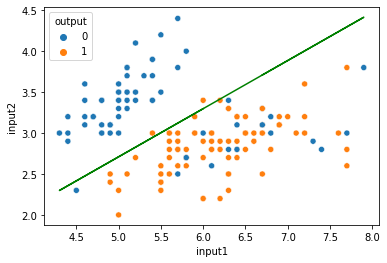

In [ ]:
sns.scatterplot(x="input1", y="input2", hue='output', data=data)  # scatter plot of all data points according to class

m = (-(fin_weights_hidden[0][1]*fin_weights_output[0][0] +   # slope as calculated above
      fin_weights_hidden[1][1]*fin_weights_output[0][1] + 
      fin_weights_hidden[2][1]*fin_weights_output[0][2])) / (fin_weights_hidden[0][2]*fin_weights_output[0][0] + 
       fin_weights_hidden[1][2]*fin_weights_output[0][1] + 
       fin_weights_hidden[2][2]*fin_weights_output[0][2])
      
c = (-(fin_weights_hidden[0][0]*fin_weights_output[0][0] +   # y-intercept as calculated above
      fin_weights_hidden[1][0]*fin_weights_output[0][1] + 
      fin_weights_hidden[2][0]*fin_weights_output[0][2]) +
      fin_weights_output[0][3]) / (fin_weights_hidden[0][2]*fin_weights_output[0][0] + 
       fin_weights_hidden[1][2]*fin_weights_output[0][1] + 
       fin_weights_hidden[2][2]*fin_weights_output[0][2])
      
x = data.input1.to_numpy()
y = data.input2.to_numpy()

y = m*x + c  # plotting the decision boundary

plt.plot(x, y, 'g')  
plt.show()

Question 1 (c) In this case, the test error using a single layered network was lower than the test error using a multilayered network. Whether the former or the latter gives a better result depend on the situation at hand. 

Here, the classification worked well with the linear decision boundary of one perceptron and hence, the error was slightly lower in that case. It can also be observed that the training data is noisy, the model that is better able to generalise and predict the outputs of the test data had a lower test error. In this case, the single layered perceptron.

We also see that there isn't a significant difference (except two clearly visible points) between the two models and the decision boundaries we get in each case. If final classification by both is more or less similar, we can attribute the lower test error of the first model (almost 1/5th of the other) to a more accurate assignment of weights and an output closer to the actual output. For eg. if the output wanted is 1, the first model might give us 0.975 and the second model 0.899. While both outputs are correct in terms of classification, the former is more accurate and therefore, has a lesser test error when compared to actual outputs. $(1-0.975)^2 < (1-0.899)^2$



Question 2 (a) (i) If you initialise a multi-layered perceptron with equal weights, while finding the derivative of the cost function with respect to each of the weights, it will come to the same value. Consequently, after weight updation (which is dependent on this derivative aka gradient descent) all weights will have the same value. Since the updated weight matrix also has weights of equal value, the process repeats and the weights remain equal for each subsequent iteration. This implies that each input is being given the same weightage and hence, learning i.e. assigning the right weights to each input is not happening.

(ii) If you initialise a multi-layered perceptron with large weights, the dot product while calculating forward pass (to calculate the network output for a given set of inputs) will turn out significantly high because it directly depends on the value of the weights. This is not ideal, especially in the case of a Sigmoid activation function, since it will map this value close to 1 where the slope is flatter and therefore, learning will be slower. Moreover, higher weights also imply that the effect of any change in the weights on the output is quite significant, which is not desirable.